In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pandas.read_csv("Churn_Modelling.csv")
df.shape

(10000, 14)

In [3]:
df.drop(['CustomerId',"Surname","RowNumber"],axis=1,inplace=True)
df.shape

(10000, 11)

In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


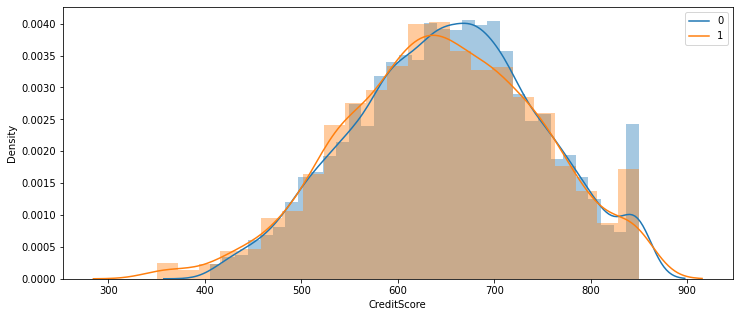

In [6]:
plt.figure(figsize=(12,5))
sns.distplot(df["CreditScore"][df["Exited"]==0])
sns.distplot(df["CreditScore"][df["Exited"]==1])
plt.legend(['0','1'])

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


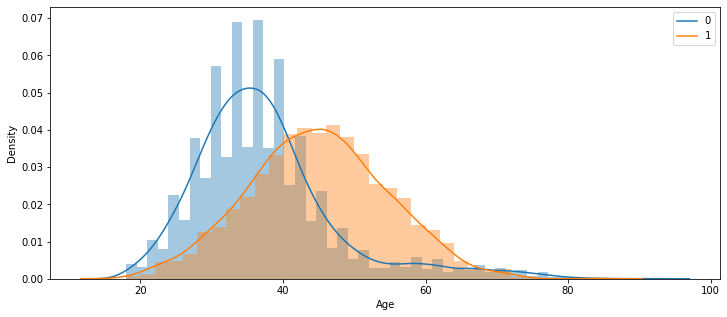

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(df["Age"][df["Exited"]==0])
sns.distplot(df["Age"][df["Exited"]==1])
plt.legend(['0','1'])
plt.show()

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


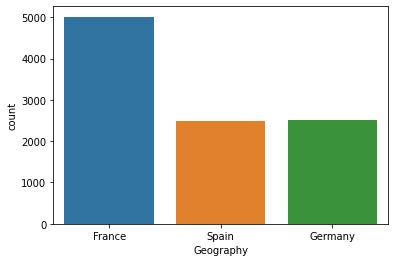

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


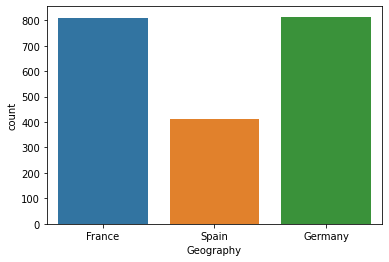

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(df['Geography'])
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(df['Geography'][df['Exited']==1])
plt.show()

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


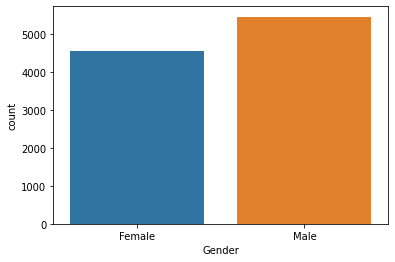

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


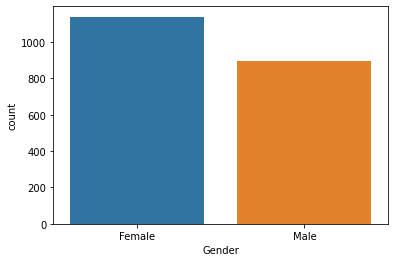

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(df['Gender'])
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(df['Gender'][df['Exited']==1])
plt.show()

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


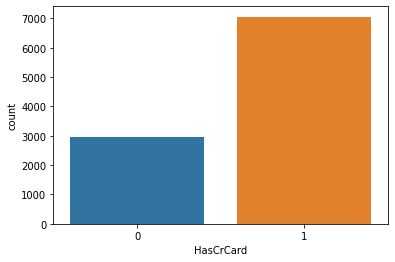

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


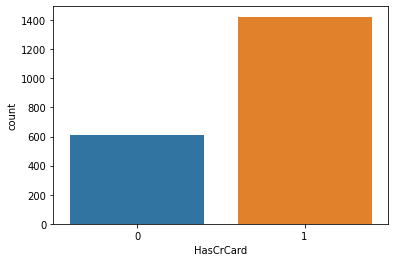

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(df['HasCrCard'])
plt.show()
plt.figure(figsize=(6,4))
sns.countplot(df['HasCrCard'][df['Exited']==1])
plt.show()

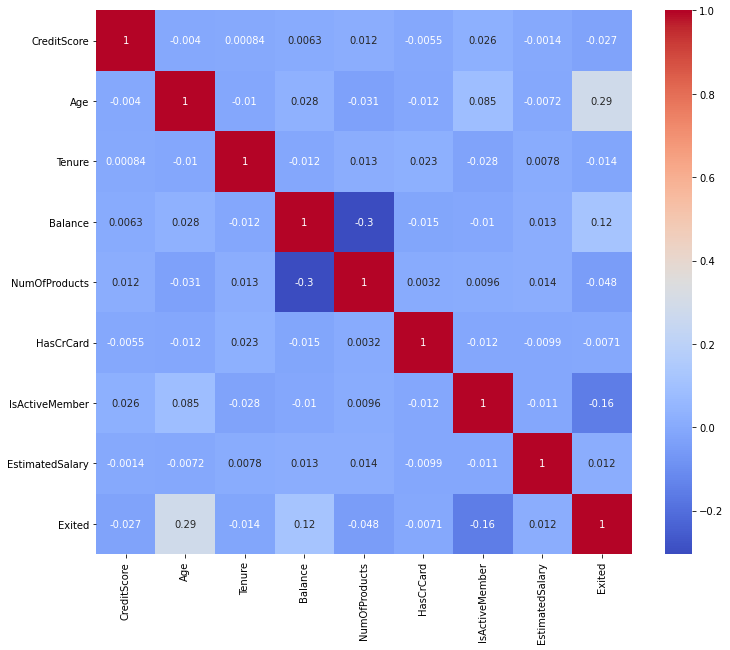

In [11]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

In [12]:
df = df[["Age", "Geography", "Gender", "Balance", "IsActiveMember", "Exited"]]
x = df.drop(["Exited"],axis=1)
y = df["Exited"]

In [14]:
le1 = LabelEncoder()
x["Geography"] = le1.fit_transform(x["Geography"])
le2 = LabelEncoder()
x["Gender"] = le2.fit_transform(x["Gender"])

In [21]:
ohe = OneHotEncoder()
x = ohe.fit_transform(x).toarray()

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(xtrain,ytrain)

/home/leeladhar/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
ypred = model.predict(xtest)

In [31]:
accuracy_score(ytest, ypred)

0.828